ВАРИАНТ 12

Задание 1

Переобучение (overfitting) в машинном обучении — это ситуация, когда модель слишком точно подстраивается под обучающую выборку. Она не просто учит закономерности, а запоминает каждый пример, включая ошибки, шум и случайные отклонения. Такая модель показывает высокую точность на уже знакомых данных, но плохо работает на новых.

Методы предотвращения:

- Регуляризация. Добавляет штраф за сложность модели, помогая предотвратить переобучение. Например, L1-регуляризация обнуляет незначимые параметры, что помогает автоматически отобрать наиболее важные признаки, L2-регуляризация делает веса модели менее экстремальными, сглаживая её поведение и снижая чувствительность к отдельным примерам.
- Использование большего объёма данных. Больший объём данных предоставляет модели больше примеров для обучения, что способствует лучшему выявлению истинных закономерностей и уменьшает влияние случайных шумов. В случаях, когда собрать больше данных сложно, можно использовать методы аугментации — искусственно увеличивать размер набора данных путём модификации существующих примеров.
- Кросс-валидация. Все данные делятся на несколько частей, модель обучается на одной группе данных и проверяется на оставшейся. Это помогает оценить модель на разных частях данных, что помогает избежать переобучения на конкретной выборке.

Задание 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
df = pd.read_csv('data12.1.csv')

print(df.head())
print(df.info())
print(df.describe())

         x1        x2        x3        x4         x5          y
0  1.872701 -3.148671 -1.755965  5.409050  -2.843846  12.010831
1  4.753572  0.419009 -1.653761  6.964298  15.905821  15.628256
2  3.659970  3.729458 -0.452958  7.021461   6.789313   0.238706
3  2.993292  2.322249  0.734731  1.716939  -1.369955  -9.022858
4  0.780093  3.065611  1.827169  5.001128  -5.193964 -17.242366
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   x3      1000 non-null   float64
 3   x4      1000 non-null   float64
 4   x5      1000 non-null   float64
 5   y       1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB
None
                x1           x2           x3           x4           x5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.451283   

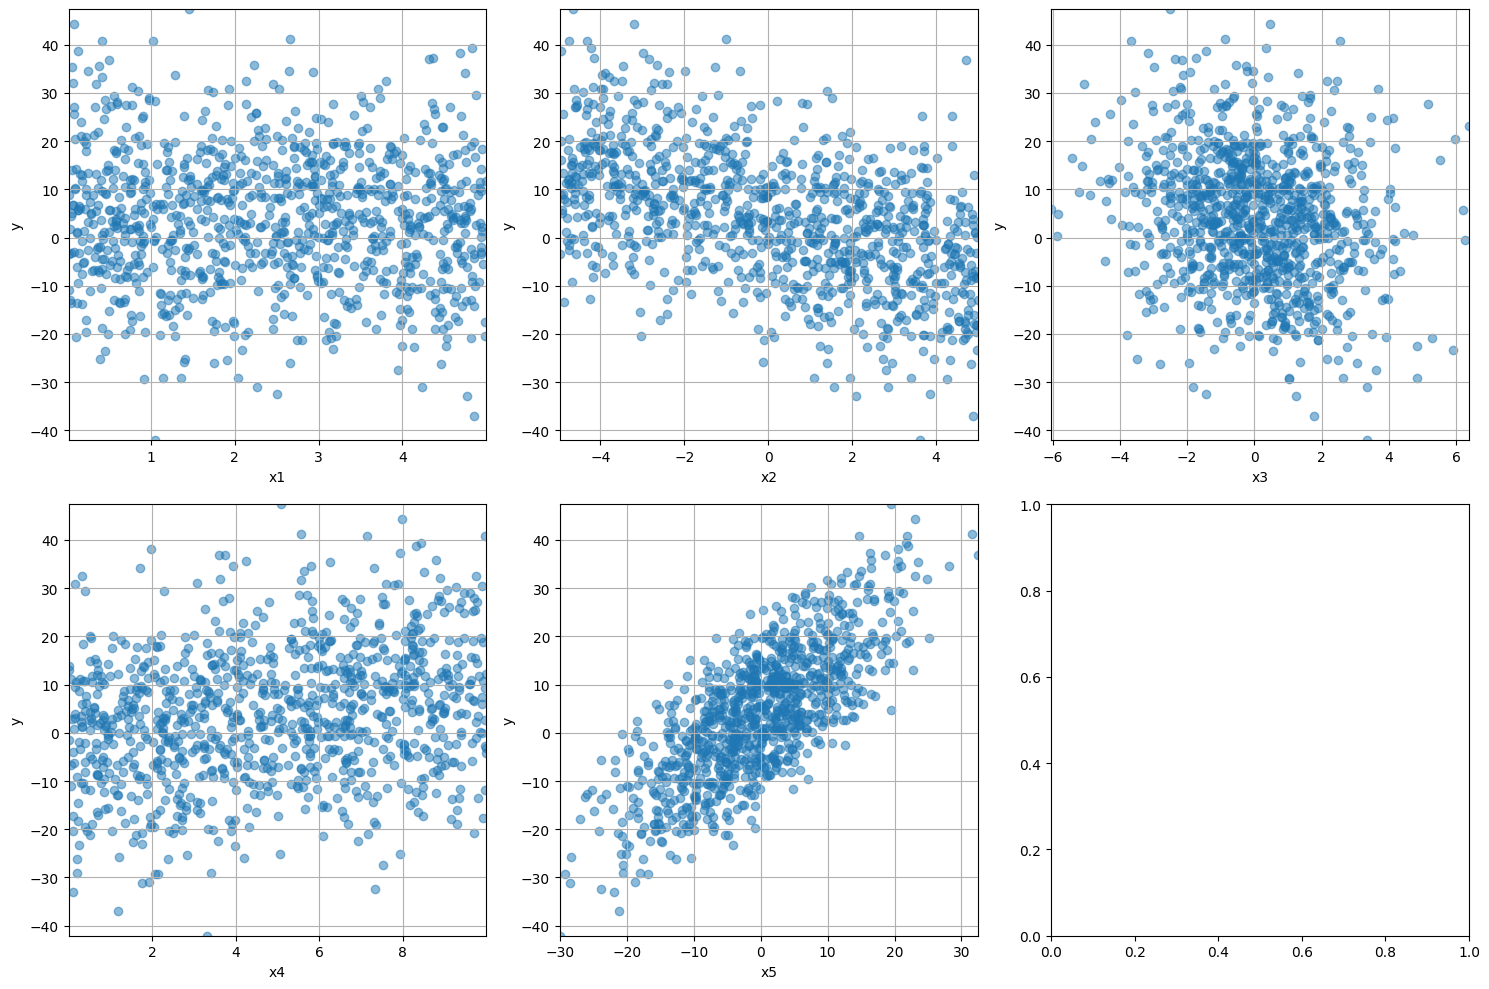

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(df.columns[:-1]):
    axes[i].scatter(df[col], df['y'], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('y')
    axes[i].grid(True)
    axes[i].set_xlim(df[col].min(), df[col].max())
    axes[i].set_ylim(df['y'].min(), df['y'].max())

plt.tight_layout()
plt.show()

In [ ]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model1 = LinearRegression(fit_intercept=False)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [ ]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

model2 = LinearRegression()
model2.fit(X_train_norm, y_train)
y_pred2 = model2.predict(X_test_norm)

In [ ]:
model3 = Ridge(alpha=1.0)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [ ]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

grid_search = GridSearchCV(
    Ridge(),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

model4 = grid_search.best_estimator_
y_pred4 = model4.predict(X_test)

In [ ]:
model5 = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model5.fit(X_train_norm, y_train)
y_pred5 = model5.predict(X_test_norm)

In [ ]:
def print_metrics(model_name, y_true, y_pred, model):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{model_name}:")
    print(f"  R^2 = {r2:.4f}")
    print(f"  MAE = {mae:.4f}")
    print(f"  MSE = {mse:.4f}")
    if hasattr(model, 'coef_'):
        print(f"  Коэффициенты: {model.coef_}")
    if hasattr(model, 'intercept_'):
        print(f"  Свободный член: {model.intercept_}")
    print()

In [ ]:
print("Результаты обучения моделей:")
print_metrics("Модель 1 (fit_intercept=False)", y_test, y_pred1, model1)
print_metrics("Модель 2 (нормированные данные)", y_test, y_pred2, model2)
print_metrics("Модель 3 (L2-регуляризация)", y_test, y_pred3, model3)
print_metrics("Модель 4 (GridSearchCV)", y_test, y_pred4, model4)
print_metrics("Модель 5 (SGDRegressor)", y_test, y_pred5, model5)

Результаты обучения моделей:
Модель 1 (fit_intercept=False):
  R^2 = 0.9110
  MAE = 3.3557
  MSE = 17.6810
  Коэффициенты: [-0.44325716 -2.48765035 -1.02225617  1.11599602  0.99125632]
  Свободный член: 0.0

Модель 2 (нормированные данные):
  R^2 = 0.9122
  MAE = 3.3267
  MSE = 17.4421
  Коэффициенты: [-0.74199016 -7.25497808 -1.98190223  3.11973631  9.95070538]
  Свободный член: 3.5793299515533485

Модель 3 (L2-регуляризация):
  R^2 = 0.9122
  MAE = 3.3265
  MSE = 17.4402
  Коэффициенты: [-0.50689712 -2.48610607 -1.01890059  1.0824627   0.99209279]
  Свободный член: 0.3812948994293577

Модель 4 (GridSearchCV):
  R^2 = 0.9122
  MAE = 3.3267
  MSE = 17.4421
  Коэффициенты: [-0.50716996 -2.48647418 -1.01924682  1.08264826  0.99210194]
  Свободный член: 0.3810974682856596

Модель 5 (SGDRegressor):
  R^2 = 0.9120
  MAE = 3.3298
  MSE = 17.4762
  Коэффициенты: [-0.76902081 -7.25586723 -1.99622084  3.11088764  9.91795269]
  Свободный член: [3.57332855]



Задание 3

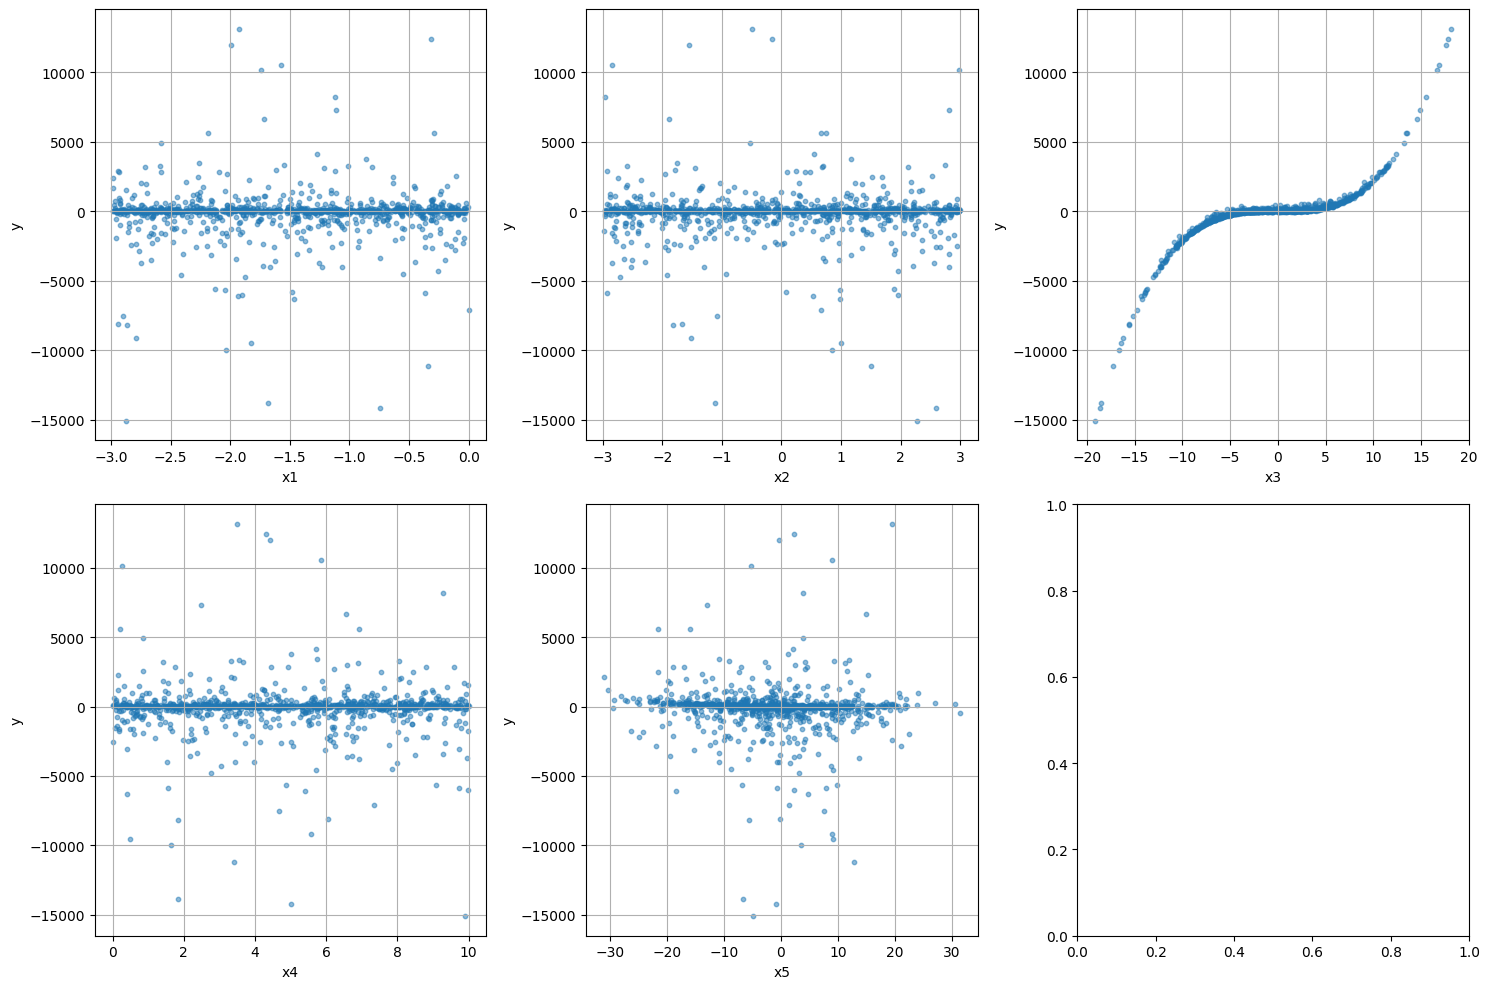

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor

# Загрузка данных
df = pd.read_csv('data12.2.csv')
X = df.drop(columns='y')
y = df['y']

# Визуализация данных (проекции по всем осям)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], y, alpha=0.5, s=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('y')
    axes[i].grid(True)
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_a = LinearRegression(fit_intercept=False)
model_a.fit(X_train, y_train)
y_pred_a = model_a.predict(X_test)
print('Model A (fit_intercept=False):')
print('R^2:', r2_score(y_test, y_pred_a))
print('MAE:', mean_absolute_error(y_test, y_pred_a))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_a)))
print('Coefficients:', model_a.coef_)
print('Intercept:', model_a.intercept_)

Model A (fit_intercept=False):
R^2: 0.539117689546416
MAE: 809.1084271008741
RMSE: 1448.750262242787
Coefficients: [  0.63162249 -27.92397128 228.90941956   8.79133915  -3.52595429]
Intercept: 0.0


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Полиномиальная регрессия 3-й степени
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = Ridge(alpha=1.0)
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

print('Polynomial Regression (degree=3):')
print('R^2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Polynomial Regression (degree=3):
R^2: 0.9999999999519757
MAE: 0.011105780086224341
RMSE: 0.014788665454761683
Coefficients: [ 0.00000000e+00  8.05245937e-01  2.32303253e-03 -2.06199897e-03
  5.72789782e-03 -7.00629775e-04 -1.14542010e-01  1.86053937e-03
  4.09539944e+00  1.34407139e-02 -7.67645960e-04  9.99630698e-01
  3.67491483e-05 -3.34697230e-04  2.04934818e-04  9.23907678e-05
 -1.43061350e-04 -1.06228533e-08  2.73596642e-04 -9.99934109e-01
  5.00005828e-01 -1.96642460e-02  2.80990966e-04 -1.38070597e-03
  3.64919074e-03 -1.51029737e-04  2.41011142e-04  5.95818065e-05
 -1.67699565e-04  3.32943144e-05  3.84159319e-05  7.36107378e-05
 -3.42601826e-06 -1.85090575e-04  4.27591618e-05  8.58388568e-06
  1.53217545e-04 -1.04776064e-05  9.91882699e-05 -3.47689185e-05
 -1.00343924e-05  2.77036354e-06  3.72190614e-06 -2.55455357e-06
 -1.56446338e-05  2.10161020e-06  2.19999938e+00 -9.06974812e-06
 -7.46394531e-07  2.07776452e-05 -8.95301469e-07  6.79146473e-07
 -2.96513340e-05  3.85977180e-

Провекра на переобучение

In [ ]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Оценка на тренировочных и тестовых данных
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Переобучение проверка:')
print(f'Разница R^2 (train - test): {train_r2 - test_r2:.4f}')
print(f'Разница RMSE (test - train): {test_rmse - train_rmse:.4f}')

Переобучение проверка:
Разница R^2 (train - test): -0.0000
Разница RMSE (test - train): 0.0005


(a) Каким типом функции описываются данные?
Данные описываются полиномиальной функцией 2-й степени (или выше), так как линейная модель даёт низкое качество, а признаки взаимодействуют между собой.

(b) Имеются ли в данных незначимые признаки?
Да, в полиномиальной модели многие коэффициенты близки к нулю, что говорит о незначимости некоторых признаков или их взаимодействий.

(c) Переобучения нет, т.к. Разница R^2 нулевая